In [707]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np

LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [708]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2025-03-24 22:25:01,505 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:81:8D:26:04:64
2025-03-24 22:25:04,550 | INFO     |: Connected to C0:81:8D:26:04:64


In [145]:
ble.send_command(CMD.ORIENT, "")

In [146]:
ble.send_command(CMD.SET_OPID, "1.5|0.002|0.001")

In [120]:
ble.send_command(CMD.SET_TARGET, "304|-90")

In [709]:
ble.send_command(CMD.DRIVE, "")

prop = []
time = []
motor = []
tof_arr1 = []
tof_arr2 = []
tofstamps = []
dist_targ = []
orient_targ = []
ble.send_command(CMD.START_COLLECTION, "")

In [649]:
#Prompt recording data from loop
prop = []
time = []
motor = []
dist_targ = []
orient_targ = []
def pid_data_handler(uuid, bytearr):
    try:
        piddata = ble.bytearray_to_string(bytearr)
        arr = piddata.split("Prop:")[1] #Split messages
        prop1, arr = arr.split("Motor:")
        motor1, arr = arr.split("Time:")
        time1, arr = arr.split("dist:")
        dist, ang = arr.split("ang:")
        prop.append(int(prop1))
        motor.append(int(motor1))
        time.append(int(time1))
        dist_targ.append(int(dist))
        orient_targ.append(int(ang))
        
    except Exception as e:
        print(e)


ble.start_notify(ble.uuid['RX_STRING'], pid_data_handler)


In [650]:
ble.send_command(CMD.GET_PID, "")

In [710]:
#Prompt recording data from loop
tof_arr1 = []
tof_arr2 = []
tofstamps = []

def tof_data_handler(uuid, bytearr):
    try:
        tofdata = ble.bytearray_to_string(bytearr)
        arr = tofdata.split("tof1:")[1] #Split messages
        tof1, arr = arr.split("tof2:")
        tof2, time = arr.split("T:")
        tof_arr1.append(float(tof1))
        tof_arr2.append(float(tof2))
        tofstamps.append(int(time))
    except Exception as e:
        print(e)


ble.start_notify(ble.uuid['RX_STRING'], tof_data_handler)


12 MS for pid loop
30-40 MS for TOF reading


In [648]:
ble.stop_notify(ble.uuid['RX_STRING'],)

In [711]:
ble.send_command(CMD.GET_TOF_DATA, "")

200


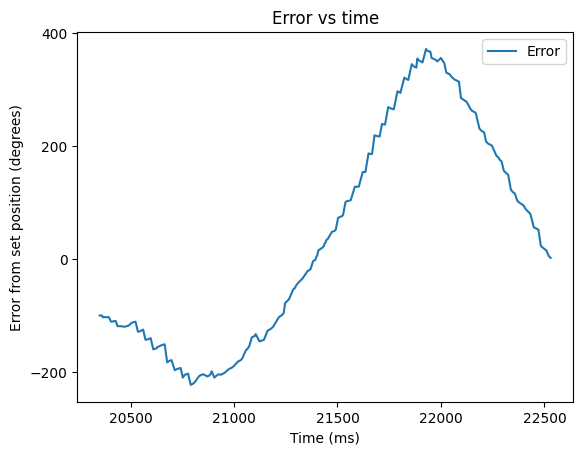

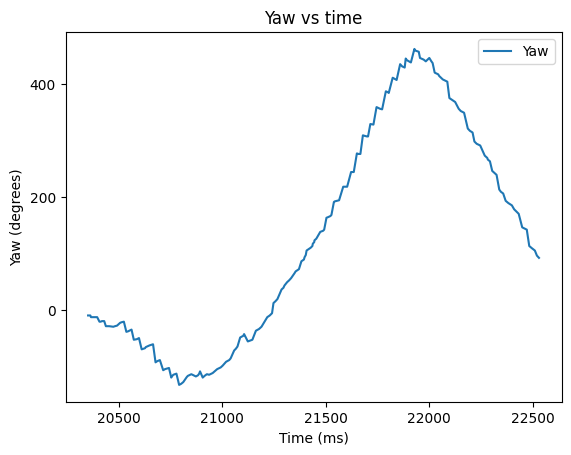

In [590]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import locator_params
import numpy as np

def sum_lists_map(list1, list2):
    return list(map(lambda x, y: x + y, list1, list2))
#print(time)

plt.plot(time[5:], prop[5:])
print(len(prop))

plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Error"], loc="upper right")
plt.title('Error vs time')
plt.ylabel('Error from set position (degrees)')
plt.xlabel('Time (ms)')
plt.show()

yaw = sum_lists_map(prop, orient_targ)

plt.plot(time[5:], yaw[5:])

plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Yaw"], loc="upper right")
plt.title('Yaw vs time')
plt.ylabel('Yaw (degrees)')
plt.xlabel('Time (ms)')
plt.show()

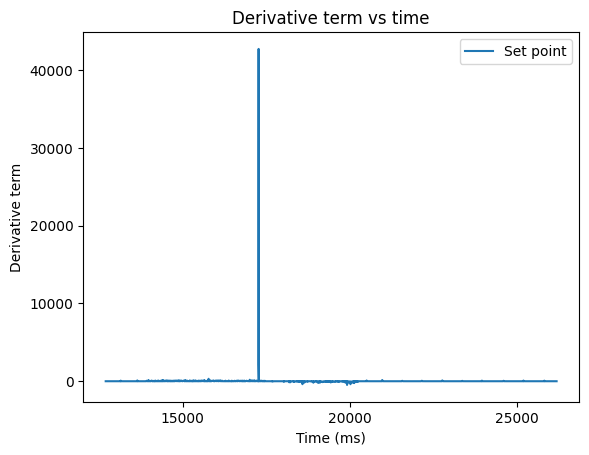

2025-03-18 03:54:27,943 | INFO     |: Disconnected from 1EFFEDB9-73BA-9396-D724-47E443C12C76


In [110]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import locator_params
import numpy as np

#print(time)

plt.plot(time, dist_targ)


plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Set point"], loc="upper right")
plt.title('Derivative term vs time')
plt.ylabel('Derivative term')
plt.xlabel('Time (ms)')
plt.show()

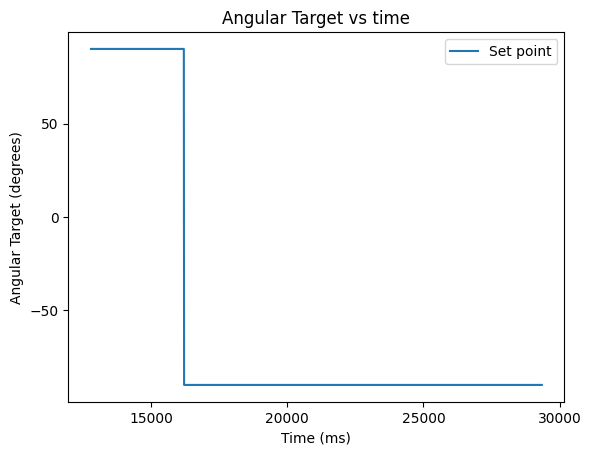

In [87]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import locator_params
import numpy as np

#print(time)

plt.plot(time, orient_targ)


plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Set point"], loc="upper right")
plt.title('Angular Target vs time')
plt.ylabel('Angular Target (degrees)')
plt.xlabel('Time (ms)')
plt.show()

In [722]:
tofstamps = [84400, 84404, 84411, 84431, 84449, 84465, 84476, 84488, 84511, 84519, 84532, 84542, 84553, 84566, 84580, 84595, 84614, 84630, 84640, 84653, 84662, 84675, 84684, 84696, 84703, 84708, 84713, 84724, 84751, 84762, 84774, 84784, 84789, 84796, 84801, 84808, 84818, 84823, 84830, 84840, 84852, 84873, 84888, 84899, 84906, 84915, 84926, 84931, 84939, 84948, 84953, 84964, 84976, 84987, 84994, 84999, 85009, 85015, 85022, 85033, 85037, 85043, 85050, 85054, 85066, 85071, 85080, 85089, 85098, 85109, 85126, 85137, 85148, 85160, 85170, 85175, 85192, 85197, 85208, 85214, 85219, 85226, 85232, 85242, 85247, 85253, 85261, 85270, 85280, 85296, 85311, 85322, 85329, 85334, 85341, 85351, 85356, 85365, 85375, 85392, 85404, 85414, 85424, 85437, 85447, 85458, 85471, 85480, 85492, 85503, 85513, 85524, 85536, 85546, 85557, 85570, 85579, 85594, 85606, 85621, 85638, 85653, 85660, 85664, 85671, 85681, 85688, 85698, 85704, 85714, 85725, 85730, 85738, 85747, 85758, 85770, 85780, 85791, 85796, 85813, 85824, 85835, 85847, 85857, 85863, 85868, 85874, 85882, 85891, 85896, 85902, 85914, 85928, 85939, 85951, 85966, 85977, 85990, 85999, 86011, 86023, 86039, 86045, 86056, 86066, 86072, 86078, 86085, 86090, 86100, 86106, 86113, 86124, 86134, 86145, 86157, 86167, 86178, 86183, 86191, 86200, 86211, 86216, 86229, 86244, 86254, 86268, 86276, 86288, 86300, 86314, 86325, 86337, 86349, 86360, 86372, 86394, 86397, 86406, 86409, 86413, 86415, 86417, 86419, 86421, 86423, 86426, 86427, 86431, 86433, 86435, 86443, 86446, 86452, 86454, 86456, 86459, 86461, 86463, 86471, 86473, 86476, 86479, 86485, 86488, 86489, 86496, 86498, 86502, 86504, 86507, 86510, 86512, 86514, 86518, 86520, 86523, 86525, 86526, 86528, 86531, 86533, 86538, 86540, 86542, 86546, 86547, 86549, 86552, 86555, 86558, 86560, 86561, 86563, 86566, 86568, 86572, 86575, 86579, 86580, 86582, 86584, 86587, 86590, 86593, 86594, 86596, 86598, 86601, 86604, 86609, 86612, 86614, 86616, 86618, 86619, 86628, 86629, 86637, 86639, 86643, 86646, 86649, 86651, 86652, 86654, 86657, 86660, 86665, 86667, 86670, 86671, 86673, 86675, 86684, 86686, 86689, 86690, 86692, 86701, 86703, 86706, 86708, 86710, 86714, 86717, 86719, 86721, 86723, 86726, 86728, 86731, 86735, 86736, 86738, 86741, 86743, 86745, 86749, 86752, 86754, 86756, 86758, 86761, 86763, 86768, 86770, 86771, 86773, 86776, 86778, 86780, 86784, 86787, 86789, 86791, 86793, 86796, 86798, 86803, 86805, 86806, 86808, 86811, 86813, 86815, 86819, 86822, 86824, 86826, 86828, 86831, 86833, 86838, 86840, 86841, 86843, 86846, 86848, 86850, 86854, 86857, 86859, 86861, 86863, 86866, 86868, 86873, 86875, 86876, 86878, 86881, 86883, 86885, 86889, 86892, 86894, 86896, 86898, 86901, 86903, 86908, 86910, 86911, 86913, 86916, 86918, 86920, 86924, 86927, 86929, 86931, 86933, 86936, 86938, 86941, 86945, 86946, 86948, 86951, 86953, 86955, 86959, 86962, 86964, 86966, 86968, 86972, 86974, 86980, 86982, 86984, 86985, 86987, 86989, 86991, 87000, 87004, 87006, 87007, 87010, 87013, 87015, 87018, 87020, 87021, 87024, 87026, 87029, 87033, 87036, 87039, 87041, 87042, 87045, 87048, 87050, 87055, 87057, 87058, 87062, 87072, 87074, 87076, 87078, 87080, 87083, 87089, 87091, 87093, 87096, 87102, 87104, 87106, 87110, 87112, 87114, 87117, 87119, 87121, 87127, 87130, 87138, 87141, 87144, 87146, 87148, 87150, 87154, 87155, 87158, 87160, 87163, 87166, 87167, 87175, 87176, 87178, 87180, 87182, 87184, 87190, 87193, 87197, 87199, 87201, 87204, 87208, 87211, 87213, 87214, 87216, 87219, 87221, 87225, 87228, 87229, 87232, 87234, 87236, 87240, 87243, 87248, 87250, 87251, 87253, 87255, 87258, 87266, 87268, 87272, 87274]
tof_arr1 = [3542.0, 3557.399, 3578.959, 3640.56, 3615.0, 3640.326, 3656.714, 3703.0, 3416.0, 3272.5, 3567.0, 3639.217, 3711.434, 3599.0, 3614.515, 3377.0, 3437.0, 3483.363, 3510.636, 3598.0, 3644.605, 3509.0, 3464.5, 3415.954, 3387.636, 3556.0, 3564.294, 3578.117, 3597.0, 3615.342, 3427.0, 3360.214, 3329.857, 3447.0, 3452.454, 3458.818, 3467.909, 3472.454, 3546.0, 3578.029, 3360.0, 3430.0, 3483.333, 3520.0, 3408.0, 3401.333, 3394.0, 3390.666, 3411.0, 3411.909, 3412.363, 3413.363, 3316.0, 3285.189, 3267.216, 3278.0, 3259.826, 3249.913, 3238.347, 3296.0, 3298.646, 3301.823, 3305.529, 3307.646, 3254.0, 3246.363, 3234.909, 3197.0, 3172.217, 3144.956, 3175.0, 3163.312, 3155.75, 3109.0, 3090.384, 3081.923, 3058.0, 3048.437, 3030.906, 3021.343, 3013.375, 3033.0, 3027.853, 3020.5, 3016.823, 3012.411, 2956.0, 2934.0, 2912.0, 2911.0, 2890.428, 2876.285, 2859.0, 2849.545, 2838.515, 2822.757, 2814.878, 2777.0, 2751.944, 2713.222, 2734.0, 2720.421, 2709.105, 2657.0, 2632.088, 2607.176, 2582.0, 2557.0, 2529.727, 2509.0, 2484.666, 2460.333, 2446.0, 2425.0, 2404.0, 2393.0, 2377.411, 2354.029, 2305.0, 2265.888, 2238.0, 2204.5, 2189.843, 2181.468, 2168.0, 2144.666, 2129.818, 2108.605, 2101.0, 2078.666, 2056.333, 2046.181, 2017.0, 1992.294, 1965.117, 1953.0, 1931.0, 1909.0, 1899.0, 1885.0, 1854.578, 1834.894, 1771.0, 1738.846, 1721.307, 1706.692, 1689.153, 1694.0, 1672.0, 1661.0, 1647.8, 1616.0, 1579.437, 1552.625, 1536.0, 1501.405, 1477.621, 1434.0, 1404.473, 1372.263, 1341.0, 1294.5, 1278.088, 1255.0, 1226.333, 1210.697, 1195.06, 1176.818, 1162.0, 1131.911, 1115.5, 1096.352, 1066.0, 1034.941, 1003.882, 968.0, 935.333, 902.666, 887.818, 855.0, 821.764, 785.205, 768.588, 762.0, 721.783, 694.135, 626.0, 591.128, 549.282, 497.0, 438.363, 395.363, 387.0, 348.351, 315.648, 285.0, 217.971, 209.228, 202.0, 192.235, 182.47, 177.588, 172.705, 167.823, 162.941, 158.058, 150.735, 148.294, 138.529, 133.647, 128.764, 131.0, 111.031, 97.718, 93.281, 88.843, 82.187, 77.75, 73.312, 55.562, 51.125, 43.0, 33.736, 19.842, 12.894, 10.578, -5.631, -10.263, -19.526, -24.157, 15.0, 11.387, 9.58, 7.774, 4.161, 2.354, -0.354, -2.161, -3.064, -4.87, -7.58, -9.387, 28.0, 29.258, 30.096, 31.774, 32.193, 33.032, 34.29, 35.548, 36.806, 37.645, 38.064, 38.903, 40.161, 41.0, 20.0, 18.5, 17.5, 17.25, 16.75, 16.25, 15.5, 14.75, 14.0, 13.75, 13.25, 12.75, 12.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 9.0, 8.0, 6.666, 5.666, 4.666, 3.999, 3.666, 2.999, 1.999, 0.999, -0.666, -1.333, 8.0, 7.906, 7.843, 7.781, 7.5, 7.437, 7.343, 7.312, 7.25, 5.0, 4.718, 4.437, 4.25, 4.062, 3.687, 3.406, 3.218, 3.031, 2.843, 2.562, 2.375, 2.093, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 3.0, 2.75, 2.687, 2.562, 2.375, 2.25, 2.125, 1.875, 1.687, 1.562, 1.437, 1.312, 1.125, 1.0, 5.0, 5.228, 5.285, 5.4, 5.571, 5.685, 5.8, 6.028, 6.199, 6.314, 6.428, 6.542, 6.714, 6.828, 3.0, 2.771, 2.714, 2.599, 2.428, 2.314, 2.2, 1.971, 1.799, 1.685, 1.571, 1.457, 1.285, 1.171, 6.0, 6.342, 6.428, 6.599, 6.857, 7.028, 7.199, 7.542, 7.8, 7.971, 8.142, 8.314, 8.571, 8.742, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 4.818, 4.787, 4.727, 4.636, 4.575, 4.515, 4.393, 4.303, 4.242, 4.181, 4.121, 9.0, 9.375, 10.125, 10.375, 10.5, 10.75, 11.0, 11.25, 11.5, 12.625, 4.0, 3.687, 3.375, 2.906, 2.437, 2.125, 1.656, 1.343, 1.187, 0.718, 0.406, -0.062, -0.687, 6.0, 6.25, 6.375, 6.437, 6.625, 6.812, 6.937, 7.25, 7.375, 7.437, 7.687, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 9.352, 9.529, 9.617, 10.058, 10.235, 10.5, 10.676, 10.852, 11.382, 11.647, 7.0, 6.437, 6.25, 6.125, 6.0, 5.875, 5.687, 5.562, 5.375, 5.25, 5.062, 4.875, 4.812, 3.0, 2.809, 2.619, 2.428, 2.238, 2.047, 1.476, 1.19, 0.809, 0.619, 0.428, 0.142, 6.0, 6.363, 6.545, 6.636, 6.818, 7.09, 7.272, 7.636, 7.909, 8.0, 8.272, 8.454, 8.636, 7.0, 7.125, 7.281, 7.343, 7.375, 7.437, 7.5, 7.593, 7.843, 7.906, 6.0, 5.937]

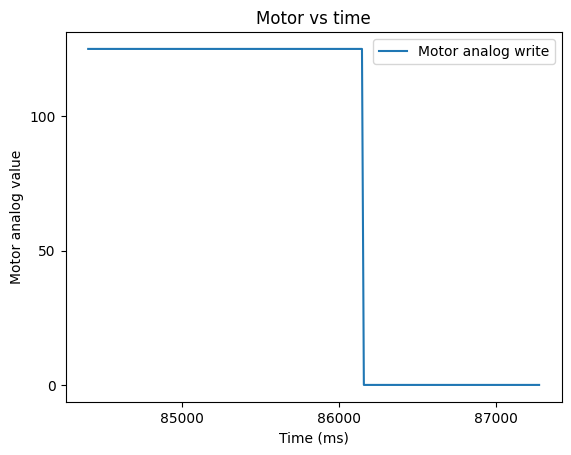

In [726]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import locator_params
import numpy as np
from scipy.optimize import curve_fit

#print(tof_arr1[0:100])

def exp_decay(x, A, b):
    return A * np.exp(-b * x)
'''def linear(x, m, c):
    return m * x + c


print(len(tof_arr1))

def quadratic(x, a, b, c):
    return a * x**2 + b * x + c
'''
def polynomial(x, *coeffs):
    # coeffs will be the coefficients [a_n, a_(n-1), ..., a_1, a_0]
    degree = len(coeffs) - 1
    return sum(c * x**(degree-i) for i, c in enumerate(coeffs))



tofstampss = np.array(tofstamps[100:])  # If it's not already a numpy array
#tofstampss = (tofstampss-tofstampss[0])/1000
tof_arr1s = np.array(tof_arr1[100:])  
#bounds = ([-np.inf, 0], [0, np.inf])
#p0 = [0, 0, tof_arr1[0]] 
p0 = [3000,0.1, 0, 0]

params, covariance = curve_fit(polynomial, tofstampss, tof_arr1s, p0=p0,maxfev=100000000 )
  # If it's not already a numpy array

#tof_arr1s[len(tof_arr1s)-17:len(tof_arr1s)] = 0



moto = []
for i in range(len(tof_arr1)):
    if(tof_arr1[i]>1000):
        moto.append(125)
    else:
        moto.append(0)

plt.plot(tofstamps, moto)
fit_tof = polynomial(tofstampss, *params)

#plt.plot(tofstampss, fit_tof, 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f,d=%5.3f' % tuple(params))

plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Tof Sensor 1", "Fit Curve"], loc="upper right")
plt.title('TOF measurements vs time')
plt.ylabel('TOF samples (mm)')
plt.xlabel('Time (ms)')
plt.show()

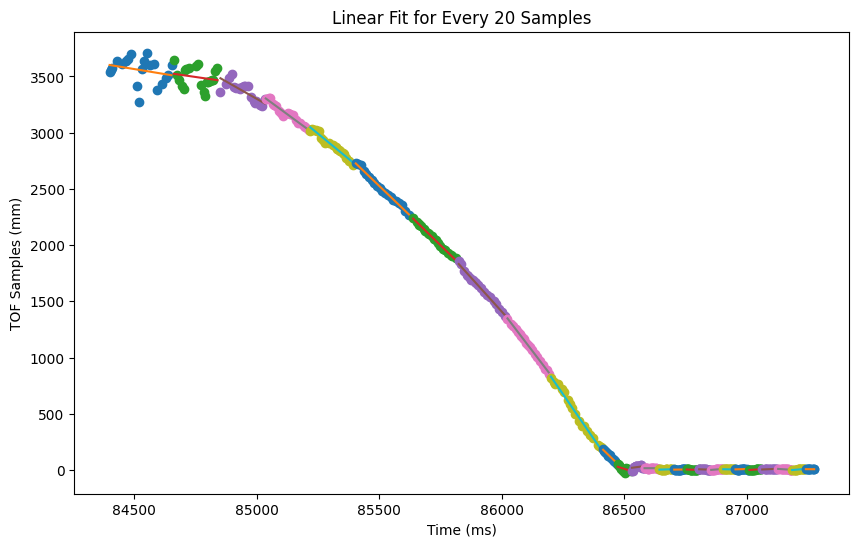

84400


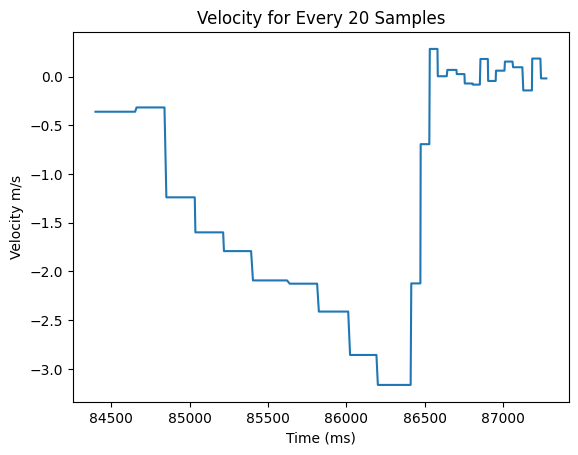

[np.float64(-0.3603301453098957), np.float64(-0.3165658875964592), np.float64(-1.2394568554036067), np.float64(-1.5990739144565334), np.float64(-1.7916551914299852), np.float64(-2.092661231227896), np.float64(-2.126127153341484), np.float64(-2.4125478639122666), np.float64(-2.8580394029149003), np.float64(-3.1656247843824863), np.float64(-2.1233057377378897), np.float64(-0.6936207558004113), np.float64(0.2844186389654093), np.float64(0.003931504455723545), np.float64(0.068930375547548), np.float64(0.025951418922623426), np.float64(-0.0703541520163602), np.float64(-0.08206448940876299), np.float64(0.18132466672476677), np.float64(-0.04455949936439718), np.float64(0.06112478121338771), np.float64(0.15449730337040335), np.float64(0.0962611494179968), np.float64(-0.14176341162370876), np.float64(0.18550825954772354), np.float64(-0.018363176895864752)]


In [735]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define your linear function (slope and intercept)
def linear(x, m, b):
    return m * x + b

# Example Data (replace with your actual data)
# Let's assume tofstamps and tof_arr1 are your x and y data respectively
tofs = np.array(tofstamps[0:])
tofa = np.array(tof_arr1[0:])

# Define chunk size (in your case, every 10 samples)
chunk_size = 20
velocities = []
# Create a plot
plt.figure(figsize=(10, 6))
# Loop through the data in chunks of 'chunk_size' (in this case 10 samples)
for start_idx in range(0, len(tofs), chunk_size):
    end_idx = start_idx + chunk_size
    # Slice the data for the current chunk
    x_chunk = tofs[start_idx:end_idx]
    y_chunk = tofa[start_idx:end_idx]
    
    # Fit a linear model to the current chunk of data
    params, _ = curve_fit(linear, x_chunk, y_chunk, p0=[1, 1])  # p0 is the initial guess for slope and intercept
    
    # Get the fitted line for this chunk
    fitted_line = linear(x_chunk, *params)
    slope = params[0]
    velocity_m_per_s = slope  # Convert mm/ms to m/s
    velocities.append(velocity_m_per_s)
    
    # Plot the original data and the fitted line for this chunk
    plt.plot(x_chunk, y_chunk, 'o', label=f'Chunk {start_idx//chunk_size + 1} Data')
    plt.plot(x_chunk, fitted_line, '-', label=f'Fit Chunk {start_idx//chunk_size + 1}')

# Customize plot
plt.title('Linear Fit for Every 20 Samples')
plt.xlabel('Time (ms)')
plt.ylabel('TOF Samples (mm)')
#plt.legend()
plt.show()

graph_vel = []
for i in range(len(tofa)):
    #print(int(i/chunk_size))
    
    graph_vel.append(velocities[int(i/chunk_size)])
    if(abs(velocities[int(i/chunk_size)] + 2.65) <0.1):
        print(tofstamps[len(graph_vel)])

print(tofstamps[0])
plt.plot(tofstamps,graph_vel)
plt.title('Velocity for Every 20 Samples')
plt.xlabel('Time (ms)')
plt.ylabel('Velocity m/s')
#plt.legend()
plt.show()
print(velocities)

[-2.8807 -2.8832 -2.8858 -2.888  -2.8896 -2.8911 -2.8921 -2.8927 -2.8931
 -2.893  -2.8927 -2.8919 -2.8908 -2.8894 -2.8875 -2.8853 -2.8825 -2.879
 -2.8748 -2.8692 -2.8629 -2.8581 -2.8556 -2.853  -2.8488 -2.8444 -2.8398
 -2.8352 -2.8305 -2.824  -2.8188 -2.8145 -2.8087 -2.8015 -2.7929 -2.7844
 -2.7758 -2.7692 -2.7596 -2.747  -2.7367 -2.7256 -2.7146 -2.7063 -2.7005
 -2.6947 -2.6871 -2.6777 -2.6698 -2.6635 -2.653  -2.6374 -2.6219 -2.6073
 -2.5896 -2.5721 -2.5555 -2.5399 -2.5247 -2.507  -2.4857 -2.4686 -2.4552
 -2.4383 -2.4252 -2.4152 -2.4044 -2.3942 -2.3813 -2.3675 -2.356  -2.34
 -2.321  -2.3017 -2.2802 -2.2593 -2.239  -2.2233 -2.2104 -2.1934 -2.1731
 -2.1566 -2.1379 -2.1083 -2.0814 -2.0551 -2.0307 -2.0081 -1.9807 -1.9505
 -1.9211 -1.8935 -1.8644 -1.8361 -1.8074 -1.7643 -1.7321 -1.7165 -1.7007
 -1.6915 -1.6836 -1.6782 -1.6729 -1.6676 -1.6623 -1.6556 -1.6502 -1.6435
 -1.6354 -1.63   -1.6164 -1.6014 -1.589  -1.578  -1.5724 -1.5655 -1.5585
 -1.553  -1.539  -1.5249 -1.5179 -1.5094 -1.4966 -1.48

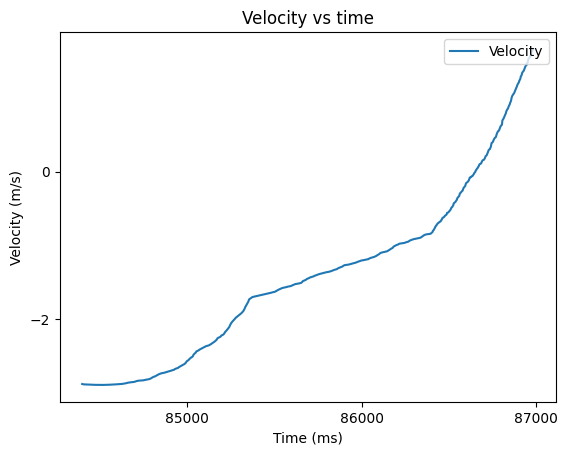

In [65]:
mm_to_m = lambda mm_list: [float(mm) / 1000 for mm in mm_list]
diffs = lambda arr: [arr[i] - arr[i-1] for i in range(1, len(arr))]


element_wise_divide = lambda arr1, arr2: [a / b for a, b in zip(arr1, arr2)]

#meters = mm_to_m(tof_arr1[300:])
#secs = mm_to_m(tofstamps[300:])
meters = mm_to_m(fit_tof)
secs = mm_to_m(tofstampss)
diff_meters = diffs(meters)
diff_secs = diffs(secs)


vels = element_wise_divide(diff_meters,diff_secs)

 

import matplotlib.pyplot as plt
from matplotlib.pyplot import locator_params
import numpy as np
indices = np.arange(len(meters)-1)

vels = np.around(vels, decimals=4)
print(vels)
plt.plot(tofstamps[:411], vels)

plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Velocity"], loc="upper right")
plt.title('Velocity vs time')
plt.ylabel('Velocity (m/s)')
plt.xlabel('Time (ms)')
plt.show()

## IMU Accelerometer data retrieval

512


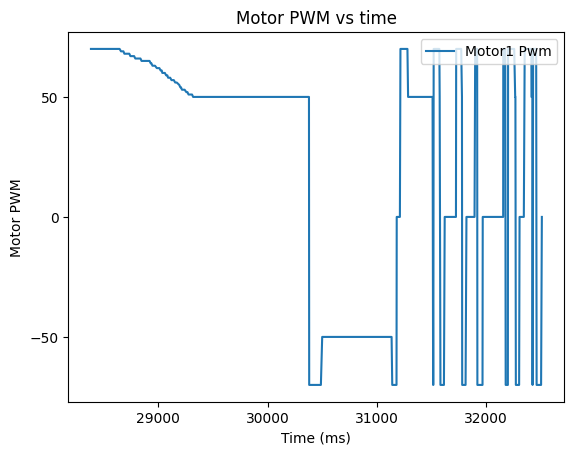

In [741]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import locator_params
import numpy as np

#print(tofstamps)

def motor2_list(int_list):
    mlist = [int(-1.52*float(x)) for x in int_list]
    return mlist

#plt.plot(tofstamps, motor)

motor2 = motor2_list(motor)

print(len(tof_arr1))
plt.plot(tofstamps, motor)

plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Motor1 Pwm", "Motor2 Pwm"], loc="upper right")
plt.title('Motor PWM vs time')
plt.ylabel('Motor PWM')
plt.xlabel('Time (ms)')
plt.show()

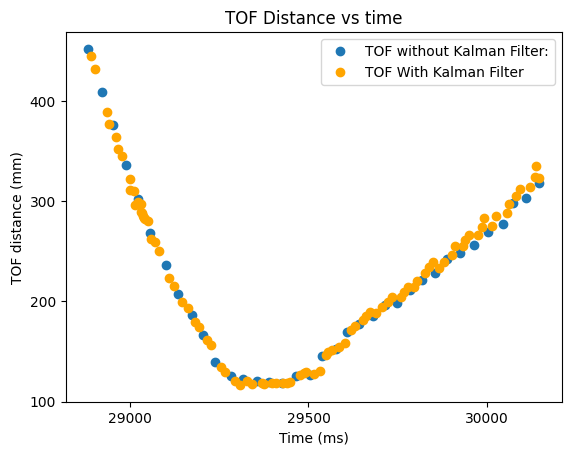

In [715]:
tof_orig = []
tof_origt = []
tof_kal = []
tof_kalt = []
for i in range(len(tof_arr1)):
    if (int(tof_arr1[i]) == tof_arr1[i]):
        tof_orig.append(tof_arr1[i])
        tof_origt.append(tofstamps[i])
    else:
        tof_kal.append(tof_arr1[i])
        tof_kalt.append(tofstamps[i])

plt.plot(tof_origt[40:76], tof_orig[40:76], 'o')
plt.plot(tof_kalt[85:175], tof_kal[85:175], 'o', color='orange')
plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["TOF without Kalman Filter:", "TOF With Kalman Filter"], loc="upper right")
plt.title('TOF Distance vs time')
plt.ylabel('TOF distance (mm)')
plt.xlabel('Time (ms)')
plt.show()

In [742]:
motor = [70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 69, 69, 69, 68, 68, 68, 68, 68, 68, 67, 67, 67, 67, 66, 66, 66, 66, 66, 65, 65, 65, 65, 65, 65, 64, 64, 63, 63, 63, 62, 62, 62, 61, 61, 60, 60, 60, 59, 59, 58, 58, 57, 57, 57, 56, 56, 55, 54, 54, 53, 53, 53, 52, 52, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, -70, -70, -70, -70, -70, -70, -70, -70, -70, -70, -70, -70, -70, -70, -70, -70, -70, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -50, -70, -70, -70, -70, -70, -70, -70, -70, -70, 0, 0, 0, 0, 0, 0, 0, 0, 70, 70, 70, 70, 70, 70, 70, 70, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, -70, -70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 50, -70, -70, -70, -70, -70, -70, -70, -70, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 50, -70, -70, -70, -70, -70, -70, -70, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 70, 70, 70, 70, 70, 70, -70, -70, -70, -70, -70, -70, -70, -70, -70, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 70, 70, 70, 70, -70, -70, -70, -70, -70, 70, 70, 70, 70, 70, 70, 70, 70, 50, 50, -70, -70, -70, -70, -70, -70, -70, -70, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 70, 70, 70, 70, 70, 70, 70, 70, 70, 50, 50, -70, 70, 70, 70, 70, 70, 70, 70, -70, -70, -70, -70, -70, -70, -70, -70, -70, -70, 0]
tof_arr1 = [1480.256, 1480.538, 1475.0, 1473.472, 1471.25, 1473.0, 1472.421, 1467.0, 1463.363, 1461.545, 1464.0, 1463.153, 1462.0, 1454.0, 1448.054, 1441.0, 1435.184, 1432.105, 1436.0, 1434.108, 1432.351, 1422.0, 1417.947, 1414.631, 1411.315, 1406.0, 1400.322, 1394.645, 1397.0, 1394.0, 1391.0, 1382.0, 1376.545, 1371.545, 1378.0, 1376.705, 1374.941, 1358.0, 1351.714, 1345.428, 1341.428, 1338.0, 1327.0, 1320.0, 1311.947, 1309.105, 1300.0, 1291.875, 1285.0, 1279.0, 1273.224, 1266.4, 1253.0, 1244.828, 1241.114, 1232.942, 1229.0, 1220.789, 1213.842, 1202.0, 1184.0, 1184.0, 1174.129, 1171.225, 1159.0, 1147.97, 1146.0, 1139.5, 1137.062, 1133.406, 1117.0, 1109.75, 1099.204, 1088.0, 1079.138, 1070.277, 1072.0, 1067.809, 1063.619, 1039.0, 1019.0, 1011.0, 995.645, 986.612, 993.0, 988.909, 984.409, 964.0, 945.875, 935.906, 939.0, 936.023, 931.261, 924.714, 911.0, 902.2, 889.4, 887.0, 873.105, 862.0, 853.666, 845.333, 837.0, 824.878, 820.0, 806.606, 797.0, 787.315, 780.657, 767.0, 753.578, 746.473, 741.0, 725.54, 712.0, 696.181, 686.515, 689.0, 682.674, 679.799, 675.2, 660.0, 650.885, 641.771, 634.0, 618.242, 609.575, 613.0, 605.404, 600.489, 576.0, 566.309, 556.619, 547.0, 537.885, 528.771, 520.0, 512.184, 504.368, 485.0, 471.212, 459.545, 465.0, 458.125, 451.25, 439.0, 434.21, 431.473, 427.368, 419.842, 420.0, 415.25, 409.636, 388.0, 377.942, 373.371, 363.314, 358.0, 349.315, 340.631, 323.0, 308.151, 294.363, 298.0, 293.714, 290.857, 290.142, 288.714, 287.285, 285.857, 279.428, 277.285, 275.857, 277.0, 271.909, 270.636, 266.818, 265.545, 264.272, 256.0, 244.187, 236.968, 241.0, 236.285, 231.571, 220.0, 211.09, 202.818, 214.0, 211.315, 210.052, 208.315, 207.0, 204.711, 203.769, 202.961, 202.0, 200.039, 205.0, 206.064, 206.548, 207.322, 210.0, 211.142, 212.714, 213.857, 219.0, 221.918, 225.81, 216.0, 214.058, 224.0, 226.666, 230.545, 228.0, 229.473, 230.631, 234.0, 236.0, 237.09, 239.09, 244.0, 246.972, 251.027, 253.0, 257.135, 258.594, 259.567, 257.0, 258.333, 259.181, 260.515, 261.0, 262.6, 263.7, 275.0, 281.263, 284.947, 286.0, 289.184, 290.921, 291.5, 292.078, 294.394, 294.973, 298.0, 299.0, 301.333, 304.333, 305.0, 307.666, 309.0, 311.062, 311.75, 312.437, 315.187, 315.875, 317.937, 318.625, 319.0, 319.571, 320.142, 321.571, 322.142, 327.285, 319.0, 319.0, 319.0, 319.0, 319.0, 328.0, 329.636, 332.363, 335.363, 324.0, 322.21, 321.157, 329.0, 331.051, 332.461, 324.0, 321.105, 321.0, 319.909, 318.909, 312.0, 308.558, 305.647, 312.0, 312.0, 312.0, 312.0, 312.0, 312.0, 312.0, 312.0, 312.0, 312.0, 305.0, 303.288, 302.822, 301.733, 301.422, 300.644, 300.177, 302.0, 301.363, 300.636, 300.363, 299.727, 299.545, 299.363, 299.0, 298.333, 298.166, 297.666, 297.5, 297.25, 296.75, 296.5, 294.0, 293.558, 293.264, 292.823, 292.529, 292.235, 290.911, 290.323, 290.029, 289.735, 301.0, 301.875, 303.187, 303.625, 304.062, 306.031, 307.562, 307.781, 307.0, 307.333, 307.666, 308.5, 308.833, 309.166, 310.5, 311.0, 302.0, 301.189, 300.918, 300.783, 300.513, 299.297, 298.351, 298.081, 300.0, 299.837, 299.459, 299.297, 298.864, 298.756, 298.324, 295.0, 294.393, 294.09, 293.787, 292.575, 292.272, 291.212, 290.909, 290.454, 302.0, 303.272, 303.696, 304.121, 305.606, 306.242, 307.515, 307.939, 308.363, 300.0, 299.631, 299.578, 299.473, 299.052, 298.947, 298.684, 298.578, 298.473, 301.0, 301.305, 301.527, 301.611, 301.75, 301.805, 300.0, 299.75, 299.687, 299.531, 299.437, 299.187, 299.125, 298.968, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 296.0, 295.096, 294.838, 294.58, 293.806, 293.419, 292.774, 292.516, 292.387, 300.0, 301.028, 301.257, 301.485, 301.828, 302.057, 302.857, 303.085, 303.314, 301.0, 301.399, 301.657, 301.685, 301.828, 302.0, 302.354, 302.483, 302.548, 302.612, 302.903, 307.0, 307.441, 307.735, 310.235, 299.0, 295.848, 295.121, 294.636, 292.696, 300.0, 300.088, 300.205, 300.264, 300.411, 300.47, 300.529, 300.764, 296.0, 295.647, 295.176, 294.941, 294.705, 294.352, 294.117, 293.882, 293.058, 292.941, 292.705, 305.0, 306.125, 306.687, 306.968, 307.812, 308.375, 308.937, 311.187, 312.031, 302.0, 300.935, 299.677, 303.0, 303.285, 303.428, 303.457, 303.514, 303.742, 303.799, 299.0, 297.451, 296.419, 296.29, 295.774, 295.516, 295.129, 295.0, 294.5, 294.25, 293.375, 291.75, 291.25, 297.0, 297.363, 297.484, 297.606, 298.03]
tofstamps = [28384, 28395, 28411, 28421, 28437, 28449, 28459, 28484, 28501, 28511, 28521, 28531, 28546, 28558, 28579, 28597, 28612, 28621, 28633, 28646, 28659, 28673, 28681, 28690, 28699, 28702, 28712, 28723, 28735, 28745, 28756, 28768, 28779, 28790, 28802, 28812, 28827, 28837, 28847, 28858, 28865, 28877, 28898, 28920, 28931, 28937, 28947, 28959, 28970, 28987, 28997, 29010, 29022, 29032, 29037, 29048, 29060, 29072, 29083, 29090, 29109, 29121, 29137, 29142, 29155, 29169, 29192, 29202, 29208, 29217, 29231, 29241, 29257, 29267, 29277, 29288, 29309, 29319, 29330, 29342, 29361, 29373, 29389, 29399, 29417, 29426, 29437, 29451, 29468, 29479, 29491, 29495, 29503, 29514, 29526, 29536, 29552, 29564, 29585, 29597, 29607, 29618, 29631, 29645, 29663, 29688, 29701, 29716, 29727, 29739, 29755, 29764, 29776, 29797, 29809, 29826, 29837, 29849, 29859, 29864, 29872, 29884, 29894, 29905, 29917, 29936, 29947, 29964, 29980, 29991, 30006, 30016, 30027, 30041, 30051, 30062, 30080, 30089, 30100, 30112, 30124, 30135, 30144, 30154, 30165, 30183, 30188, 30192, 30198, 30209, 30226, 30236, 30249, 30261, 30271, 30276, 30287, 30299, 30309, 30320, 30332, 30345, 30358, 30367, 30373, 30376, 30377, 30379, 30381, 30383, 30392, 30395, 30397, 30400, 30407, 30409, 30415, 30417, 30419, 30432, 30449, 30460, 30467, 30477, 30488, 30500, 30513, 30526, 30543, 30554, 30562, 30573, 30590, 30606, 30613, 30619, 30641, 30660, 30672, 30682, 30687, 30695, 30707, 30714, 30725, 30733, 30744, 30755, 30771, 30778, 30799, 30811, 30821, 30837, 30850, 30862, 30873, 30882, 30892, 30898, 30909, 30919, 30929, 30944, 30956, 30972, 30978, 30982, 30989, 30999, 31006, 31017, 31029, 31044, 31055, 31067, 31083, 31093, 31105, 31115, 31121, 31123, 31125, 31133, 31135, 31141, 31143, 31150, 31159, 31161, 31169, 31173, 31178, 31180, 31182, 31190, 31192, 31198, 31200, 31208, 31209, 31211, 31216, 31218, 31236, 31253, 31259, 31263, 31269, 31280, 31286, 31291, 31301, 31312, 31324, 31340, 31350, 31363, 31378, 31389, 31401, 31422, 31434, 31445, 31456, 31468, 31480, 31491, 31500, 31504, 31507, 31509, 31510, 31515, 31517, 31520, 31528, 31530, 31545, 31555, 31558, 31565, 31567, 31572, 31575, 31582, 31584, 31592, 31595, 31602, 31604, 31606, 31614, 31621, 31623, 31629, 31631, 31634, 31640, 31643, 31648, 31650, 31652, 31655, 31657, 31659, 31668, 31672, 31674, 31676, 31681, 31683, 31689, 31691, 31693, 31702, 31709, 31710, 31716, 31718, 31719, 31724, 31726, 31728, 31736, 31739, 31753, 31758, 31760, 31761, 31763, 31772, 31779, 31781, 31790, 31792, 31799, 31802, 31811, 31812, 31820, 31823, 31826, 31828, 31830, 31838, 31840, 31847, 31849, 31852, 31856, 31861, 31863, 31865, 31872, 31875, 31881, 31883, 31885, 31894, 31900, 31902, 31903, 31911, 31913, 31918, 31920, 31922, 31930, 31940, 31948, 31951, 31956, 31958, 31967, 31969, 31971, 31976, 31979, 31987, 31989, 31994, 31998, 32004, 32006, 32008, 32015, 32017, 32025, 32026, 32033, 32036, 32042, 32044, 32046, 32052, 32055, 32061, 32064, 32070, 32072, 32074, 32080, 32084, 32088, 32090, 32092, 32100, 32107, 32109, 32111, 32114, 32116, 32123, 32125, 32127, 32134, 32147, 32156, 32157, 32162, 32165, 32175, 32179, 32181, 32183, 32192, 32199, 32201, 32203, 32220, 32233, 32244, 32247, 32249, 32257, 32266, 32268, 32272, 32274, 32279, 32281, 32283, 32291, 32300, 32302, 32306, 32308, 32310, 32313, 32315, 32317, 32324, 32325, 32327, 32332, 32335, 32337, 32338, 32341, 32343, 32345, 32353, 32356, 32363, 32373, 32386, 32398, 32407, 32412, 32414, 32415, 32423, 32425, 32430, 32440, 32448, 32450, 32453, 32455, 32458, 32462, 32464, 32466, 32473, 32486, 32490, 32494, 32499, 32501, 32503, 32510]

In [743]:

#d = .2386/1000
#m = .1579/1000
d = .3163/1000
m = .2093/1000

A = np.array([[0,1],[0,-d/m]])
B = np.array([[0],[1/m]])

testtof = tofstamps
testdata = tof_arr1

dt = []
summing = 0
for i in range(len(testtof)-1):
    dt =  (testtof[i+1] - testtof[i])/1000
    summing = summing+dt
Delt_T = summing/len(testtof)

Ad = np.eye(2) + 0.008*A
Bd = 0.008*B
print(Ad)
print(Bd)
C = np.array([[1,0]])


[[1.         0.008     ]
 [0.         0.98791018]]
[[ 0.        ]
 [38.22264692]]


In [757]:
sigma_3 = 2000 #plus or minus 20 mm data
sigma_1 = np.sqrt(0.005**2*1/Delt_T)
sigma_2 = np.sqrt(0.02**2*1/Delt_T)

sig_u=np.array([[sigma_1**2,0],[0,sigma_2**2]]) #We assume uncorrelated noise, and therefore a diagonal matrix works.
sig_z=np.array([[sigma_3**2]])

print(sig_u)
print(sig_z)
print(Delt_T)



[[0.00310228 0.        ]
 [0.         0.04963645]]
[[4000000]]
0.008058593749999938


In [758]:
def kf(mu,sigma,u,y,newTOF, printing): #always do both steps form moment
    
    mu_p = Ad.dot(mu) + Bd.dot(u) 
    sigma_p = Ad.dot(sigma.dot(Ad.transpose())) + sig_u
    if(printing):
        print("A Comp: ", A.dot(mu))
        print("B Comp: ", B.dot(u))
        print("mu: ", mu, "\nmu_p :", mu_p, "\nsigma :", sigma, "\nsigma_p: ", sigma_p)
    if(newTOF == 1):
        sigma_m = C.dot(sigma_p.dot(C.transpose())) + sig_z
        #print("Sigma m: ",sigma_m)
        kkf_gain = sigma_p.dot(C.transpose().dot(np.linalg.inv(sigma_m)))
        #print("KKF gain: ",kkf_gain)
        y_m = y-C.dot(mu_p)
        #print("ym: ",y_m)
        mu = mu_p + kkf_gain.dot(y_m)    
        #print("mu update: ",mu)
        sigma=(np.eye(2)-kkf_gain.dot(C)).dot(sigma_p)
        #print("sigma update: ",sigma)
    else:
        mu = mu_p
        sigma = sigma_p

    print("\n\n")

    return mu,sigma



In [759]:
#Remove interpolations
tofa_noint = []
toft_noint = []
tofmotor_noint = []
for i in range(len(tof_arr1)):
    if (int(tof_arr1[i]) == tof_arr1[i]):
        tofa_noint.append(tof_arr1[i])
        toft_noint.append(tofstamps[i])
        tofmotor_noint.append(motor[i])

[1480.256, 1480.538, 1475.0, 1473.472, 1471.25, 1473.0, 1472.421, 1467.0, 1463.363, 1461.545, 1464.0, 1463.153, 1462.0, 1454.0, 1448.054, 1441.0, 1435.184, 1432.105, 1436.0, 1434.108, 1432.351, 1422.0, 1417.947, 1414.631, 1411.315, 1406.0, 1400.322, 1394.645, 1397.0, 1394.0, 1391.0, 1382.0, 1376.545, 1371.545, 1378.0, 1376.705, 1374.941, 1358.0, 1351.714, 1345.428, 1341.428, 1338.0, 1327.0, 1320.0, 1311.947, 1309.105, 1300.0, 1291.875, 1285.0, 1279.0, 1273.224, 1266.4, 1253.0, 1244.828, 1241.114, 1232.942, 1229.0, 1220.789, 1213.842, 1202.0, 1184.0, 1184.0, 1174.129, 1171.225, 1159.0, 1147.97, 1146.0, 1139.5, 1137.062, 1133.406, 1117.0, 1109.75, 1099.204, 1088.0, 1079.138, 1070.277, 1072.0, 1067.809, 1063.619, 1039.0, 1019.0, 1011.0, 995.645, 986.612, 993.0, 988.909, 984.409, 964.0, 945.875, 935.906, 939.0, 936.023, 931.261, 924.714, 911.0, 902.2, 889.4, 887.0, 873.105, 862.0, 853.666, 845.333, 837.0, 824.878, 820.0, 806.606, 797.0, 787.315, 780.657, 767.0, 753.578, 746.473, 741.0, 725

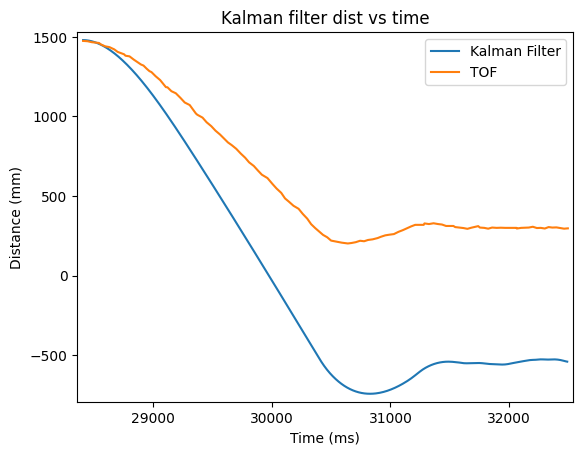

507


In [760]:
i = toft_noint[0]
j = 0
tofrange = toft_noint[len(tofa_noint)-1]
KF_dist = []
KF_time = []
us = []
newTOF = 1 #record if new tof reading or not
x = np.array([[tof_arr1[0]], [0]])
sigma = np.array([[20*2,0],[0,5**2]])

printing = False
print(tof_arr1)

while(i <= tofrange):
    '''if len(KF_dist) > 260 and len(KF_dist) < 280:
        printing = True
    else:
        printing = False'''
    KF_time.append(float(i))
    if(printing):
        print("Time: ", i, "Motor: ", motor[j], "TOF: ", tofa_noint[j], "NEW TOF: ", newTOF)
    i = i + Delt_T*1000
    x, sigma = kf(x, sigma, -(tofmotor_noint[j])/125, tofa_noint[j], newTOF, printing)
    KF_dist.append(x[0][0])
    us.append(-(tofmotor_noint[j])/166)
    if(toft_noint[j+1] <= i):
        j = j+1
        newTOF = 1

    else:
        newTOF = 0
plt.plot(KF_time, KF_dist)
plt.plot(toft_noint, tofa_noint, 0)
plt.xlim(min(KF_time) - 50, max(KF_time) + 50)
plt.ylim(min(KF_dist) - 50, max(KF_dist) + 50)
#print(toft_noint)
#plt.plot(KF_time[250:300], KF_dist[250:300], 'o',zorder=1)
#plt.scatter(toft_noint[50:100], tofa_noint[50:100],color = 'orange',zorder=2)

plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Kalman Filter","TOF"], loc="upper right")
plt.title('Kalman filter dist vs time')
plt.ylabel('Distance (mm)')
plt.xlabel('Time (ms)')
plt.show()

print(len(KF_dist))

In [761]:
ble.disconnect()

Exception: Not connected to a BLE device